# Source code for figure plots in the Paper *Solar Irradiance Forecasting to Short-Term PV Power: Accuracy Comparison of ANN and LSTM Models*

This repository contains the source code of figures of the paper available at [[Wentz et al. 2022]](https://doi.org/10.3390/en15072457).

**We encourage the spirit of researchers to contribute to more reliable and reproducible studies.**

Please, if you use this source code or part of it, cite:
*   Wentz, V.H.; Maciel, J.N.; Gimenez Ledesma, J.J.; Ando Junior, O.H. Solar Irradiance Forecasting to Short-Term PV Power: Accuracy Comparison of ANN and LSTM Models. Energies 2022, 15, 2457.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#from train_utils import *
#from utils import *

## Pre-processing dataset for plotting in each horizon time 

In [ ]:
def data_train_test_mod(data, year, ghi):

    train = data[data.index.year != year]
    
    test = data[data.index.year == year]

    twoYear = train.shape[0]
    dec = train[train.index.month == 12].shape[0]

    trainNorm = 0.1 + 0.8 * ((train - train.min()) /
                             (train.max() - train.min()))
    
    testNorm = 0.1 + 0.8 * ((test - test.min()) / (test.max() - test.min()))


    TrainDataset = np.hstack([trainNorm[i].values.reshape(
        (len(trainNorm[i]), 1)) for i in trainNorm.columns])
    TestDataset = np.hstack([testNorm[i].values.reshape(
        (len(testNorm[i]), 1)) for i in testNorm.columns])


    X_train, y_train = split_sequences_ghi(TrainDataset[:twoYear - dec], 1)
    X_train = np.nan_to_num(X_train, nan=0.1)

        
    X_val, y_val = split_sequences_ghi(TrainDataset[twoYear - dec:], 1)
    X_val = np.nan_to_num(X_val, nan=0.1)

        
    X_test, y_test = split_sequences_ghi(TestDataset, 1)
    X_test = np.nan_to_num(X_test, nan=0.1)

    n_in = X_train.shape[1] * X_train.shape[2]

    X_train = X_train.reshape((X_train.shape[0], n_in))

    X_val = X_val.reshape((X_val.shape[0], n_in))

    X_test = X_test.reshape((X_test.shape[0], n_in))

    return n_in, X_train, y_train, X_val, y_val, X_test, y_test

In [ ]:
data_irradiance = pd.read_csv("https://zenodo.org/record/2826939/files/Folsom_irradiance.csv?download=1",
                              index_col = 'timeStamp', parse_dates=True)

data_weather = pd.read_csv("https://zenodo.org/record/2826939/files/Folsom_weather.csv?download=1",
                           index_col = 'timeStamp', parse_dates=True)

data_weather["month"] = data_weather.index.month
data_weather["day"] = data_weather.index.day
data_weather["hour"] = data_weather.index.hour
data_weather["minute"] = data_weather.index.minute


In [ ]:
data = pd.concat([data_weather, data_irradiance['ghi']], axis = 1)
data.dropna(inplace=True)

In [ ]:
data.iloc[[41800, 41900, 42000, 42100, 42200, 42300, 42400, 42500, 42500]]

,air_temp,relhum,press,windsp,winddir,max_windsp,precipitation,month,day,hour,minute,ghi
timeStamp,,,,,,,,,,,,
2014-02-06 14:03:00,6.7,84.10,1004.0,1.48,96.0,1.9,0.03,2,6,14,3,0.00
2014-02-06 15:43:00,7.0,80.20,1003.0,2.40,118.8,3.2,0.00,2,6,15,43,23.78
2014-02-06 17:23:00,8.4,77.18,1003.0,2.06,131.7,3.2,0.00,2,6,17,23,163.90
2014-02-06 19:03:00,9.2,74.92,1004.0,2.50,152.0,4.2,0.00,2,6,19,3,298.20
2014-02-06 20:43:00,10.4,68.54,1002.0,3.08,135.2,4.3,0.00,2,6,20,43,232.30
2014-02-06 22:23:00,10.5,70.34,1002.0,1.68,241.6,2.6,0.00,2,6,22,23,77.38
2014-02-07 00:03:00,9.5,79.32,1002.0,1.76,236.3,3.4,0.00,2,7,0,3,63.04
2014-02-07 01:43:00,9.5,74.66,1002.0,1.24,189.7,2.5,0.00,2,7,1,43,0.00
2014-02-07 01:43:00,9.5,74.66,1002.0,1.24,189.7,2.5,0.00,2,7,1,43,0.00


In [ ]:
[41800, 41900, 42000, 42100, 42200, 42300, 42400, 42500, 42500]

In [ ]:
hora_1min = []
for i,j in zip(data.iloc[[41800, 41900, 42000, 42100, 42200, 42300, 42400, 42500, 42500]].index.hour, data.iloc[[41800, 41900, 42000, 42100, 42200, 42300, 42400, 42500, 42500]].index.minute):
  hora_1min.append(str(i)+":"+str(j))


In [ ]:
hora_1min = ['14:03', '15:43', '17:23', '19:03', '20:43', '22:23', '00:03', '01:43', '01:43']

['14:3', '15:43', '17:23', '19:3', '20:43', '22:23', '0:3', '1:43', '1:43']

In [ ]:
data.iloc[[41800, 41900, 42000, 42100, 42200, 42300, 42400, 42500, 42500]].index

DatetimeIndex(['2014-02-06 14:03:00', '2014-02-06 15:43:00',
               '2014-02-06 17:23:00', '2014-02-06 19:03:00',
               '2014-02-06 20:43:00', '2014-02-06 22:23:00',
               '2014-02-07 00:03:00', '2014-02-07 01:43:00',
               '2014-02-07 01:43:00'],
              dtype='datetime64[ns]', name='timeStamp', freq=None)

In [ ]:
data_15min = data[data.index.minute % 15 == 0]
hora15 = data_15min.iloc[[2790, 2800, 2810, 2820, 2830, 2840]].index.hour
minuto15 = data_15min.iloc[[2790, 2800, 2810, 2820, 2830, 2840]].index.minute
hora15


Int64Index([14, 17, 19, 22, 0, 3], dtype='int64', name='timeStamp')

In [ ]:
data_15min.iloc[[2790, 2800, 2810, 2820, 2830, 2840]].index

DatetimeIndex(['2014-02-06 14:30:00', '2014-02-06 17:00:00',
               '2014-02-06 19:30:00', '2014-02-06 22:00:00',
               '2014-02-07 00:30:00', '2014-02-07 03:00:00'],
              dtype='datetime64[ns]', name='timeStamp', freq=None)

In [ ]:
string_15min = []
for i, j in zip(hora15, minuto15):
  string_15min.append(str(i)+":"+str(j))

In [ ]:
string_15min

['14:30', '17:0', '19:30', '22:0', '0:30', '3:0']

In [ ]:
string_15min = ['14:30', '17:00', '19:30', '22:00', '00:30', '03:00']

In [ ]:
data_60min = data[data.index.minute % 60 == 0]
hora_60 = data_60min.iloc[[698, 700, 702, 704, 706, 708, 710]].index.hour
minuto_60 = data_60min.iloc[[698, 700, 702, 704, 706, 708, 710]].index.minute
data_60min.iloc[[698, 700, 702, 704, 706, 708, 710]]


,air_temp,relhum,press,windsp,winddir,max_windsp,precipitation,month,day,hour,minute,ghi
timeStamp,,,,,,,,,,,,
2014-02-06 14:00:00,6.70,84.70,1004.0,1.30,104.6,2.1,0.00,2,6,14,0,0.00
2014-02-06 16:00:00,7.10,80.20,1003.0,1.86,111.4,3.0,0.00,2,6,16,0,38.91
2014-02-06 18:00:00,9.16,73.36,1003.0,1.58,140.0,3.2,0.00,2,6,18,0,235.80
2014-02-06 20:00:00,9.92,71.90,1003.0,3.30,150.3,5.9,0.00,2,6,20,0,276.00
2014-02-06 22:00:00,10.64,69.86,1002.0,0.70,182.6,1.5,0.03,2,6,22,0,133.90
2014-02-07 00:00:00,9.50,79.38,1002.0,1.28,229.5,2.3,0.00,2,7,0,0,49.17
2014-02-07 02:00:00,9.46,75.36,1003.0,0.68,122.8,1.0,0.00,2,7,2,0,0.00


In [ ]:
string_60min = []
for i,j in zip(hora_60, minuto_60):
  string_60min.append(str(i)+":"+str(j))
string_60min

['14:0', '16:0', '18:0', '20:0', '22:0', '0:0', '2:0']

In [ ]:
string_60min = ['14:00', '16:00', '18:00', '20:00', '22:00', '00:00', '20:00']

In [ ]:
n_in, X_train, y_train, X_val, y_val, X_test, y_test = data_train_test_mod(data[data.index.minute % 60 == 0], 2014, False)

In [ ]:
X_train.shape

(15975, 12)

In [ ]:
X_val.shape

(1455, 12)

In [ ]:
X_test.shape

(8431, 12)

In [ ]:
data_train = data[data.index.year != 2014]
data_test = data[data.index.year == 2014]

In [ ]:
data_av_2014 = data[data.index.year == 2014]

In [ ]:
data_av_2014_15 = data_av_2014[data_av_2014.index.minute % 15 == 0]
data_av_2014_60 = data_av_2014[data_av_2014.index.minute % 60 == 0]

In [ ]:
# 15 min
print(f'Inicio: {data_av_2014_15.index.get_loc("2014-02-06 14:00:00")}')
print(f'Final: {data_av_2014_15.index.get_loc("2014-02-07 03:15:00")}')

In [ ]:
# # # 60 min
# print(f'Inicio: {data_av_2014_60.index.get_loc("2014-02-06 14:00:00")}')
# # print(f'Final: {data_av_2014_60.index.get_loc("2014-02-07 03:00:00")}')

# Plots for 1 Minute forecasting horizon

## Load

In [ ]:
data_1min = pd.read_excel("/content/drive/MyDrive/IC Victor/2022/Resultado_1min_distribuicao.xlsx", sheet_name = 0)

In [ ]:
#data_1min.head()

In [ ]:
#data.columns

In [ ]:
lista_2014 = []
lista_2015 = []
lista_2016 = []
for coluna in data_1min.columns:
  ano = coluna.split()[-1]
  #print(ano)
  if ano == '2014':
    lista_2014.append(coluna)
  elif ano == '2015':
    lista_2015.append(coluna)
  elif ano == '2016':
    lista_2016.append(coluna)

print(lista_2014)
print(lista_2015)
print(lista_2016)

['Valor Real 2014', 'Valor Predito ANN 2014', 'Valor Predito ANN Red 2014', 'Valor Predito LSTM 2014', 'Valor Predito LSTM Red 2014']
['Valor Real 2015', 'Valor Predito ANN 2015', 'Valor Predito ANN Red 2015', 'Valor Predito LSTM 2015', 'Valor Predito LSTM Red 2015']
['Valor Real 2016', 'Valor Predito ANN 2016', 'Valor Predito ANN Red 2016', 'Valor Predito LSTM 2016', 'Valor Predito LSTM Red 2016']


In [ ]:
data_2014 = data_1min[lista_2014].copy()
data_2014.dropna(inplace=True)
data_2015 = data_1min[lista_2015].copy()
data_2015.dropna(inplace=True)
data_2016 = data_1min[lista_2016].copy()
data_2016.dropna(inplace=True)

## Complete

In [ ]:
#labels

inicio, final = 41800, 42600


labelsFontSize = 18

#Uma camada
plt.rcParams.update({'font.size': 20})
fig1, axs = plt.subplots(sharey=True, figsize=(24,8))

fig1.suptitle("Complete Variables")


axs.plot(range(inicio, final), data_2014['Valor Real 2014'][inicio: final].values,  label="Real Measure")


axs.set_xlabel("2014")


#Interator
markers1 = iter(("D", "+", "X"))
markers2 = iter(("D", "+", "X"))
markers3 = iter(("D", "+", "X"))


#ann
axs.plot(range(inicio, final), data_2014['Valor Predito ANN 2014'][inicio: final].values, label='ANN Measure')
#lstm
axs.plot(range(inicio, final), data_2014['Valor Predito LSTM 2014'][inicio: final].values, label='LSTM Measure')




axs.set_ylabel("Normalized GHI")
axs.grid(True)




#fig1.legend(fontsize=15)

axs.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05),
          fancybox=True, shadow=True, ncol=3)


# 1 minuto ticks Positions: 500, 1900, 3500, 4500, 6000
# 15 minuto ticks positions: 50, 150, 250, 350, 400
# 60 minuto ticks Positions: 15, 30, 55, 80, 100

## Reduced

In [ ]:
inicio, final = 41800, 42600

labelsFontSize = 18

#Uma camada
plt.rcParams.update({'font.size': 20})
fig1, axs = plt.subplots(sharey=True, figsize=(24,8))

fig1.suptitle("Reduced Variables")

axs.plot(range(inicio, final), data_2014['Valor Real 2014'][inicio: final].values,  label="Real Measure")


axs.set_xlabel("2014")


#Interator
markers1 = iter(("D", "+", "X"))
markers2 = iter(("D", "+", "X"))
markers3 = iter(("D", "+", "X"))


#ann
axs.plot(range(inicio, final), data_2014['Valor Predito ANN Red 2014'][inicio: final].values, next(markers1), markersize = 4 , label='ANN Measure')
#lstm
axs.plot(range(inicio, final), data_2014['Valor Predito LSTM Red 2014'][inicio: final].values, next(markers1), markersize = 4, label='LSTM Measure')




axs.set_ylabel("Normalized GHI")
axs.grid(True)




#fig1.legend(fontsize=15)

axs.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05),
          fancybox=True, shadow=True, ncol=3)


# 1 minuto ticks Positions: 500, 1900, 3500, 4500, 6000
# 15 minuto ticks positions: 50, 150, 250, 350, 400
# 60 minuto ticks Positions: 15, 30, 55, 80, 100

## Figure for 1 Minute forecasting horizon

In [ ]:
lista_1 = np.arange(inicio, final)

In [ ]:
lista_2 = []

In [ ]:
for i in [41800, 41900, 42000, 42100, 42200, 42300, 42400, 42500, 42500]:
  
  lista_2.append(np.where(lista_1==i)[0][0])

In [ ]:
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes 
from mpl_toolkits.axes_grid1.inset_locator import mark_inset

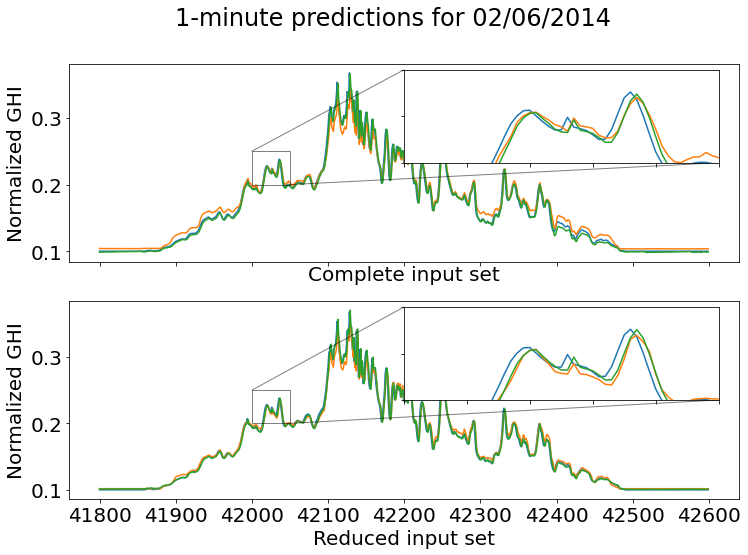

In [ ]:
#figura
fig, ax = plt.subplots(2,1, sharex= True, figsize=(12,8))
fig.suptitle("1-minute predictions for 02/06/2014")
#Plot Total
ax[0].plot(range(inicio, final), data_2014['Valor Real 2014'][inicio: final].values)
ax[0].plot(range(inicio, final), data_2014['Valor Predito ANN 2014'][inicio: final].values)
ax[0].plot(range(inicio, final), data_2014['Valor Predito LSTM 2014'][inicio: final].values)
ax[0].set_xlabel("Complete input set")

ax[1].plot(range(inicio, final), data_2014['Valor Real 2014'][inicio: final].values,  label="Real Value")
ax[1].plot(range(inicio, final), data_2014['Valor Predito ANN Red 2014'][inicio: final].values,label='ANN Predicted')
ax[1].plot(range(inicio, final), data_2014['Valor Predito LSTM Red 2014'][inicio: final].values ,label='LSTM Predicted')
ax[1].set_xlabel("Reduced Variables")

ax[0].set_ylabel("Normalized GHI")
ax[1].set_ylabel("Normalized GHI")



# Zoom
#Tamanho da caixa
axins = ax[0].inset_axes([0.5, 0.5, 0.47, 0.47])
axins.plot(range(inicio, final), data_2014['Valor Real 2014'][inicio: final].values)
axins.plot(range(inicio, final), data_2014['Valor Predito ANN 2014'][inicio: final].values)
axins.plot(range(inicio, final), data_2014['Valor Predito LSTM 2014'][inicio: final].values)


axins2 = ax[1].inset_axes([0.5, 0.5, 0.47, 0.47])
axins2.plot(range(inicio, final), data_2014['Valor Real 2014'][inicio: final].values,  label="Real Value")
axins2.plot(range(inicio, final), data_2014['Valor Predito ANN Red 2014'][inicio: final].values,label='ANN Predicted')
axins2.plot(range(inicio, final), data_2014['Valor Predito LSTM Red 2014'][inicio: final].values ,label='LSTM Predicted')

# Local do zoom
x1, x2, y1, y2 = 42000, 42050, 0.2, 0.25
axins.set_xlim(x1, x2)
axins.set_ylim(y1, y2)
axins.set_xticklabels([])
axins.set_yticklabels([])

# Local do zoom
x1, x2, y1, y2 = 42000, 42050, 0.2, 0.25
axins2.set_xlim(x1, x2)
axins2.set_ylim(y1, y2)
axins2.set_xticklabels([])
axins2.set_yticklabels([])

ax[0].indicate_inset_zoom(axins, edgecolor="black")
ax[1].indicate_inset_zoom(axins2, edgecolor='black')

plt.show()

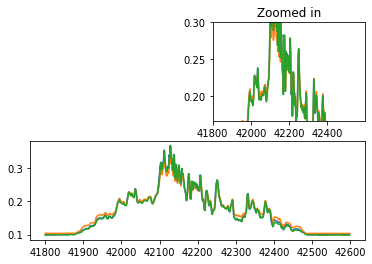

In [ ]:
from matplotlib.patches import Polygon

inicio, final = 41800, 42600


ax1 = plt.subplot(212)
ax1.margins(0.05)           # Default margin is 0.05, value 0 means fit
ax1.plot(range(inicio, final), data_2014['Valor Real 2014'][inicio: final].values)
ax1.plot(range(inicio, final), data_2014['Valor Predito ANN 2014'][inicio: final].values)
ax1.plot(range(inicio, final), data_2014['Valor Predito LSTM 2014'][inicio: final].values)

ax3 = plt.subplot(222)
ax3.margins(x=0, y=-0.25)   # Values in (-0.5, 0.0) zooms in to center
ax3.plot(range(inicio, final), data_2014['Valor Real 2014'][inicio: final].values)
ax3.plot(range(inicio, final), data_2014['Valor Predito ANN 2014'][inicio: final].values)
ax3.plot(range(inicio, final), data_2014['Valor Predito LSTM 2014'][inicio: final].values)
ax3.set_title('Zoomed in')

plt.show()

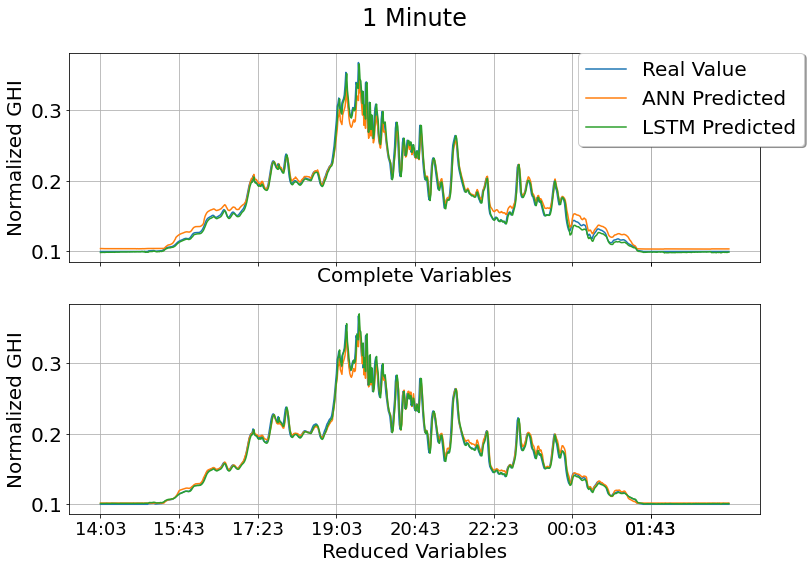

In [ ]:
inicio, final = 41800, 42600

labelsFontSize = 18

plt.rcParams.update({'font.size': 20})
fig1, axs = plt.subplots(2,1,sharex=True, figsize=(12,8))

fig1.suptitle("1 Minute")

axs[0].plot(range(inicio, final), data_2014['Valor Real 2014'][inicio: final].values,  label="Real Value")
axs[0].plot(range(inicio, final), data_2014['Valor Predito ANN 2014'][inicio: final].values ,label='ANN Predicted')
axs[0].plot(range(inicio, final), data_2014['Valor Predito LSTM 2014'][inicio: final].values ,label='LSTM Predicted')
axs[0].set_xlabel("Complete Variables")


axs[1].plot(range(inicio, final), data_2014['Valor Real 2014'][inicio: final].values,  label="Real Value")
axs[1].plot(range(inicio, final), data_2014['Valor Predito ANN Red 2014'][inicio: final].values,label='ANN Predicted')
axs[1].plot(range(inicio, final), data_2014['Valor Predito LSTM Red 2014'][inicio: final].values ,label='LSTM Predicted')
axs[1].set_xlabel("Reduced Variables")

axs[0].set_ylabel("Normalized GHI")
axs[1].set_ylabel("Normalized GHI")
#axs[1].set_xlabel("Time (UTC)")
axs[0].grid(True)
axs[1].grid(True)


axs[0].set_xticks([41800, 41900, 42000, 42100, 42200, 42300, 42400, 42500, 42500])
axs[1].set_xticks([41800, 41900, 42000, 42100, 42200, 42300, 42400, 42500, 42500])
ticksLabels  = ['14:03', '15:43', '17:23', '19:03', '20:43', '22:23', '00:03', '01:43', '01:43']
axs[0].set_xticklabels(ticksLabels, fontsize= labelsFontSize)
axs[1].set_xticklabels(ticksLabels, fontsize= labelsFontSize)


plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.01, 
                    hspace=0.2)

axs[0].legend(fontsize = 20, loc='upper center', bbox_to_anchor=(0.9, 1.05),
          fancybox=True, shadow=True, ncol=1)


In [ ]:
fig1.savefig('/content/drive/MyDrive/IC Victor/2022/Imagens/1_minuto_hora.jpeg')

# Plots for 15 Minutes forecasting horizon

## Load

In [ ]:
data_15min = pd.read_excel("/content/drive/MyDrive/IC Victor/2022/Resultados_15_energies.xlsx")

In [ ]:
lista_2014_15 = []
lista_2015_15 = []
lista_2016_15 = []
for coluna in data_15min.columns:
  ano = coluna.split()[-1]
  #print(ano)
  if ano == '2014':
    lista_2014_15.append(coluna)
  elif ano == '2015':
    lista_2015_15.append(coluna)
  elif ano == '2016':
    lista_2016_15.append(coluna)

print(lista_2014_15)
print(lista_2015_15)
print(lista_2016_15)

['Valor Real 2014', 'Valor ANN Predito 2014', 'Valor LSTM Predito 2014', 'Valor ANN Red Predito 2014', 'Valor LSTM Red 2014']
['Valor Real 2015', 'Valor ANN Predito 2015', 'Valor LSTM Predito 2015', 'Valor ANN Red Predito 2015', 'Valor LSTM Red 2015']
['Valor Real 2016', 'Valor ANN Predito 2016', 'Valor LSTM Predito 2016', 'Valor ANN Red Predito 2016', 'Valor LSTM Red 2016']


In [ ]:
data_2014_15 = data_15min[lista_2014_15].copy()
data_2014_15.dropna(inplace=True)
data_2015_15 = data_15min[lista_2015_15].copy()
data_2015_15.dropna(inplace=True)
data_2016_15 = data_15min[lista_2016_15].copy()
data_2016_15.dropna(inplace=True)

## Complete

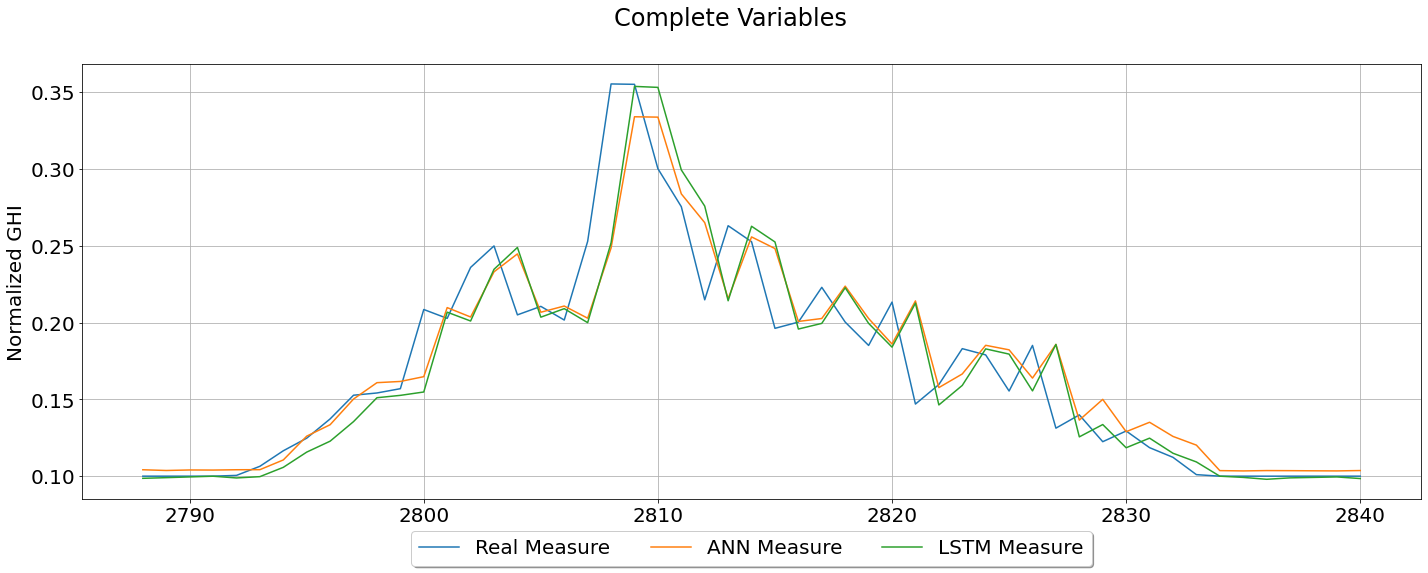

In [ ]:
#labels
inicio, final = 2788, 2841


labelsFontSize = 18

#Uma camada
plt.rcParams.update({'font.size': 20})
fig1, axs = plt.subplots(sharey=True, figsize=(24,8))

fig1.suptitle("Complete Variables")


axs.plot(range(inicio, final), data_2014_15['Valor Real 2014'][inicio: final].values,  label="Real Measure")


axs.set_xlabel("2014")


#Interator
markers1 = iter(("D", "+", "X"))
markers2 = iter(("D", "+", "X"))
markers3 = iter(("D", "+", "X"))


#ann
axs.plot(range(inicio, final), data_2014_15['Valor ANN Predito 2014'][inicio: final].values, label='ANN Measure')
#lstm
axs.plot(range(inicio, final), data_2014_15['Valor LSTM Predito 2014'][inicio: final].values, label='LSTM Measure')




axs.set_ylabel("Normalized GHI")
axs.grid(True)




#fig1.legend(fontsize=15)

axs.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05),
          fancybox=True, shadow=True, ncol=3)


# 1 minuto ticks Positions: 500, 1900, 3500, 4500, 6000
# 15 minuto ticks positions: 50, 150, 250, 350, 400
# 60 minuto ticks Positions: 15, 30, 55, 80, 100

## Reduced

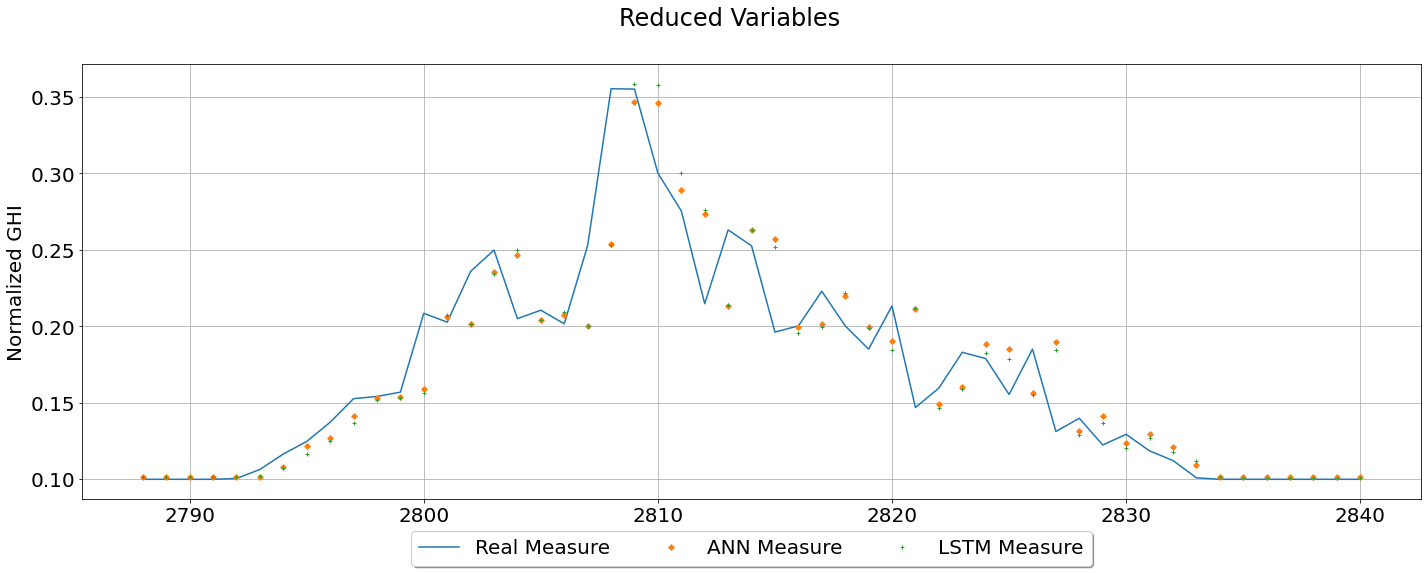

In [ ]:
inicio, final = 2788, 2841

labelsFontSize = 18

plt.rcParams.update({'font.size': 20})
fig1, axs = plt.subplots(sharey=True, figsize=(24,8))

fig1.suptitle("Reduced Variables")

axs.plot(range(inicio, final), data_2014_15['Valor Real 2014'][inicio: final].values,  label="Real Measure")


axs.set_xlabel("2014")


#Interator
markers1 = iter(("D", "+", "X"))
markers2 = iter(("D", "+", "X"))
markers3 = iter(("D", "+", "X"))


#ann
axs.plot(range(inicio, final), data_2014_15['Valor ANN Red Predito 2014'][inicio: final].values, next(markers1), markersize = 4 , label='ANN Measure')
#lstm
axs.plot(range(inicio, final), data_2014_15['Valor LSTM Red 2014'][inicio: final].values, next(markers1), markersize = 4, label='LSTM Measure')




axs.set_ylabel("Normalized GHI")
axs.grid(True)




#fig1.legend(fontsize=15)

axs.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05),
          fancybox=True, shadow=True, ncol=3)


# 1 minuto ticks Positions: 500, 1900, 3500, 4500, 6000
# 15 minuto ticks positions: 50, 150, 250, 350, 400
# 60 minuto ticks Positions: 15, 30, 55, 80, 100

## Figure for 15 minutes forecast horizon

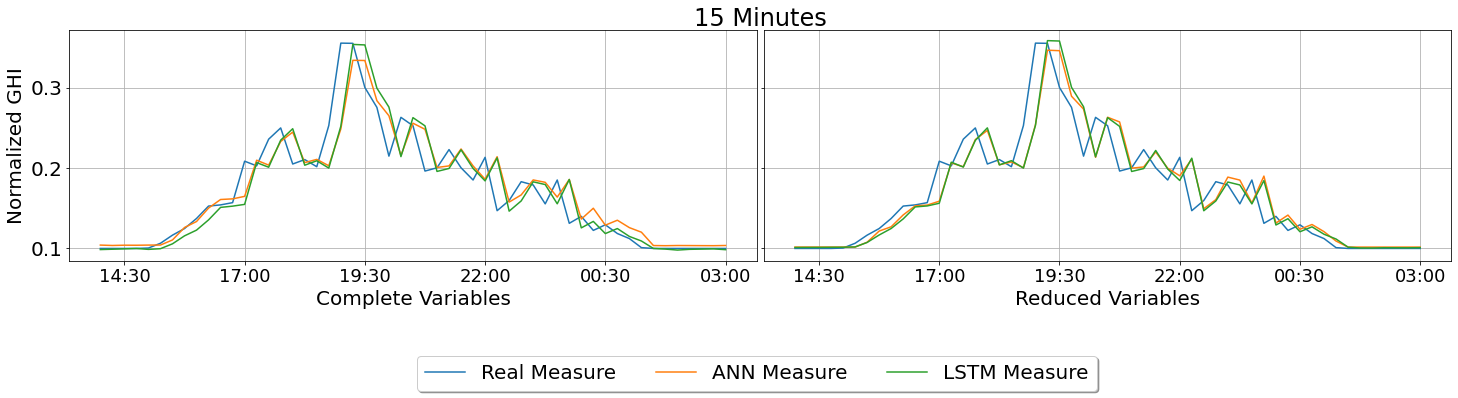

In [ ]:
inicio, final = 2788, 2841

labelsFontSize = 18

plt.rcParams.update({'font.size': 20})
fig2, axs = plt.subplots(1,2,sharey=True, figsize=(24,4))

fig2.suptitle("15 Minutes")

axs[0].plot(range(inicio, final), data_2014_15['Valor Real 2014'][inicio: final].values,  label="Real Measure")
#ann
axs[0].plot(range(inicio, final), data_2014_15['Valor ANN Predito 2014'][inicio: final].values, label='ANN Measure')
#lstm
axs[0].plot(range(inicio, final), data_2014_15['Valor LSTM Predito 2014'][inicio: final].values, label='LSTM Measure')

axs[0].set_xlabel("Complete Variables")


axs[1].plot(range(inicio, final), data_2014_15['Valor Real 2014'][inicio: final].values,  label="Real Measure")
#ann
axs[1].plot(range(inicio, final), data_2014_15['Valor ANN Red Predito 2014'][inicio: final].values, label='ANN Measure')
#lstm
axs[1].plot(range(inicio, final), data_2014_15['Valor LSTM Red 2014'][inicio: final].values, label='LSTM Measure')

axs[1].set_xlabel("Reduced Variables")

axs[0].set_ylabel("Normalized GHI")
axs[0].grid(True)
axs[1].grid(True)


axs[0].set_xticks([2790, 2800, 2810, 2820, 2830, 2840])
axs[1].set_xticks([2790, 2800, 2810, 2820, 2830, 2840])
ticksLabels = string_15min[:]
axs[0].set_xticklabels(ticksLabels, fontsize= labelsFontSize)
axs[1].set_xticklabels(ticksLabels, fontsize= labelsFontSize)

plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.01, 
                    hspace=0.4)

axs[0].legend(fontsize = 20, loc='upper center', bbox_to_anchor=(1.0, -0.37),
          fancybox=True, shadow=True, ncol=3)


In [ ]:
fig2.savefig('/content/drive/MyDrive/IC Victor/2022/Imagens/15_minuto_hora.jpeg')

# Plots for 60 Minutes forecasting horizon

## Load

In [ ]:
data_60min = pd.read_excel("/content/drive/MyDrive/IC Victor/2022/Resultado_60min_distribuicao.xlsx")

In [ ]:
lista_2014_60 = []
lista_2015_60 = []
lista_2016_60 = []
for coluna in data_60min.columns:
  ano = coluna.split()[-1]
  #print(ano)
  if ano == '2014':
    lista_2014_60.append(coluna)
  elif ano == '2015':
    lista_2015_60.append(coluna)
  elif ano == '2016':
    lista_2016_60.append(coluna)

print(lista_2014_60)
print(lista_2015_60)
print(lista_2016_60)

['Valor Real 2014', 'Valor Predito ANN 2014', 'Valor Predito ANN Red 2014', 'Valor Predito LSTM 2014', 'Valor Predito LSTM Red 2014']
['Valor Real 2015', 'Valor Predito ANN 2015', 'Valor Predito ANN Red 2015', 'Valor Predito LSTM 2015', 'Valor Predito LSTM Red 2015']
['Valor Real 2016', 'Valor Predito ANN 2016', 'Valor Predito ANN Red 2016', 'Valor Predito LSTM 2016', 'Valor Predito LSTM Red 2016']


In [ ]:
data_2014_60 = data_60min[lista_2014_60].copy()
data_2014_60.dropna(inplace=True)
data_2015_60 = data_60min[lista_2015_60].copy()
data_2015_60.dropna(inplace=True)
data_2016_60 = data_60min[lista_2016_60].copy()
data_2016_60.dropna(inplace=True)

## Complete

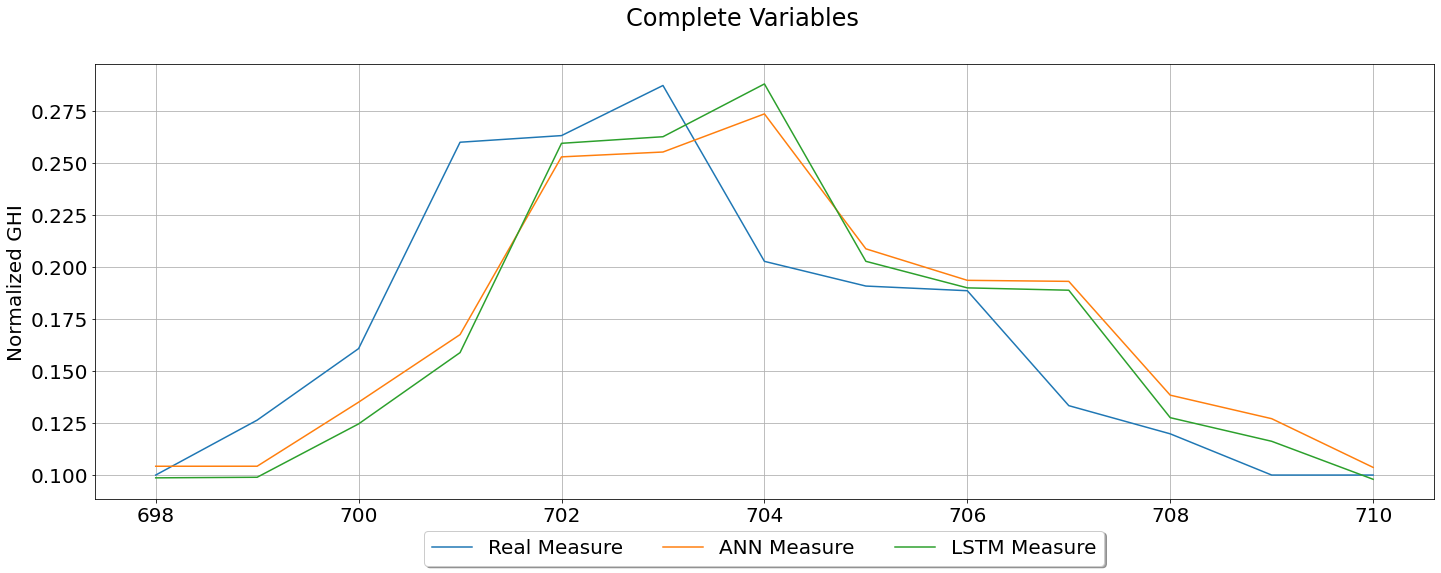

In [ ]:
#labels

inicio, final = 698, 711




labelsFontSize = 18

#Uma camada
plt.rcParams.update({'font.size': 20})
fig1, axs = plt.subplots(sharey=True, figsize=(24,8))

fig1.suptitle("Complete Variables")


axs.plot(range(inicio, final), data_2014_60['Valor Real 2014'][inicio: final].values,  label="Real Measure")


axs.set_xlabel("2014")


#Interator
markers1 = iter(("D", "+", "X"))
markers2 = iter(("D", "+", "X"))
markers3 = iter(("D", "+", "X"))


#ann
axs.plot(range(inicio, final), data_2014_60['Valor Predito ANN 2014'][inicio: final].values , label='ANN Measure')
#lstm
axs.plot(range(inicio, final), data_2014_60['Valor Predito LSTM 2014'][inicio: final].values, label='LSTM Measure')




axs.set_ylabel("Normalized GHI")
axs.grid(True)




#fig1.legend(fontsize=15)

axs.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05),
          fancybox=True, shadow=True, ncol=3)


# 1 minuto ticks Positions: 500, 1900, 3500, 4500, 6000
# 15 minuto ticks positions: 50, 150, 250, 350, 400
# 60 minuto ticks Positions: 15, 30, 55, 80, 100

## Reduced

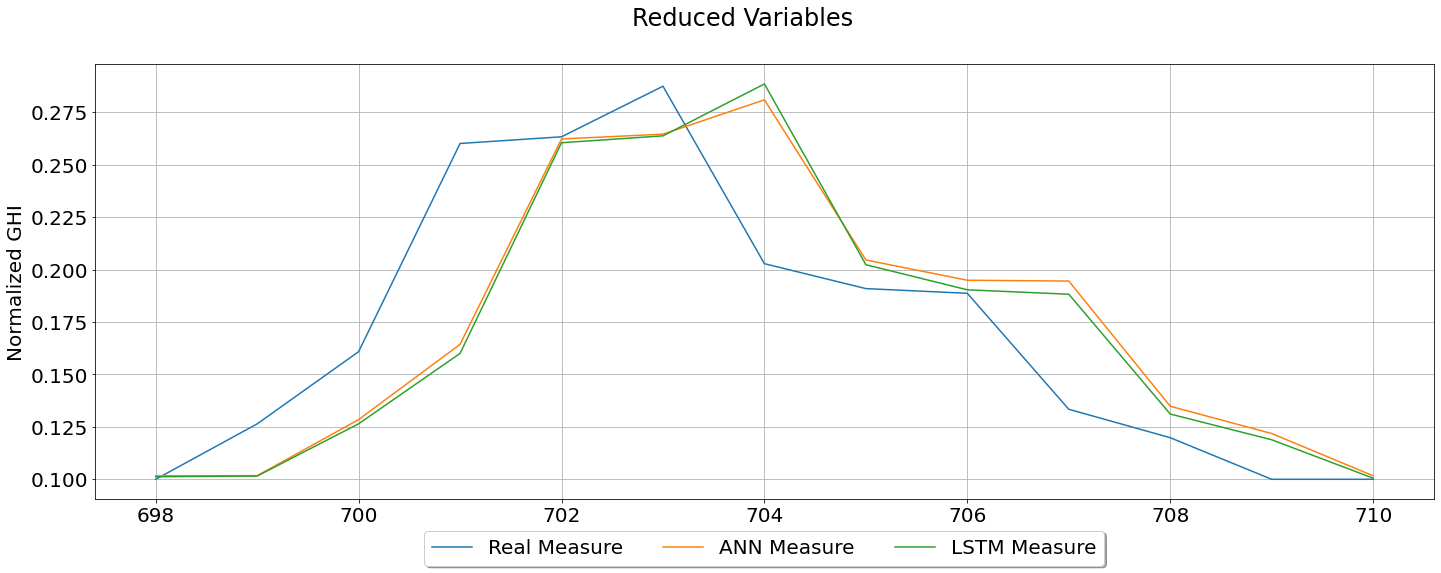

In [ ]:
inicio, final = 698, 711

labelsFontSize = 18

#Uma camada
plt.rcParams.update({'font.size': 20})
fig2, axs = plt.subplots(sharey=True, figsize=(24,8))

fig2.suptitle("Reduced Variables")

axs.plot(range(inicio, final), data_2014_60['Valor Real 2014'][inicio: final].values,  label="Real Measure")


axs.set_xlabel("2014")


#Interator
markers1 = iter(("D", "+", "X"))
markers2 = iter(("D", "+", "X"))
markers3 = iter(("D", "+", "X"))


#ann
axs.plot(range(inicio, final), data_2014_60['Valor Predito ANN Red 2014'][inicio: final].values, label='ANN Measure')
#lstm
axs.plot(range(inicio, final), data_2014_60['Valor Predito LSTM Red 2014'][inicio: final].values, label='LSTM Measure')




axs.set_ylabel("Normalized GHI")
axs.grid(True)




#fig1.legend(fontsize=15)

axs.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05),
          fancybox=True, shadow=True, ncol=3)


# 1 minuto ticks Positions: 500, 1900, 3500, 4500, 6000
# 15 minuto ticks positions: 50, 150, 250, 350, 400
# 60 minuto ticks Positions: 15, 30, 55, 80, 100

## Figure for 60 minutes forecast horizon

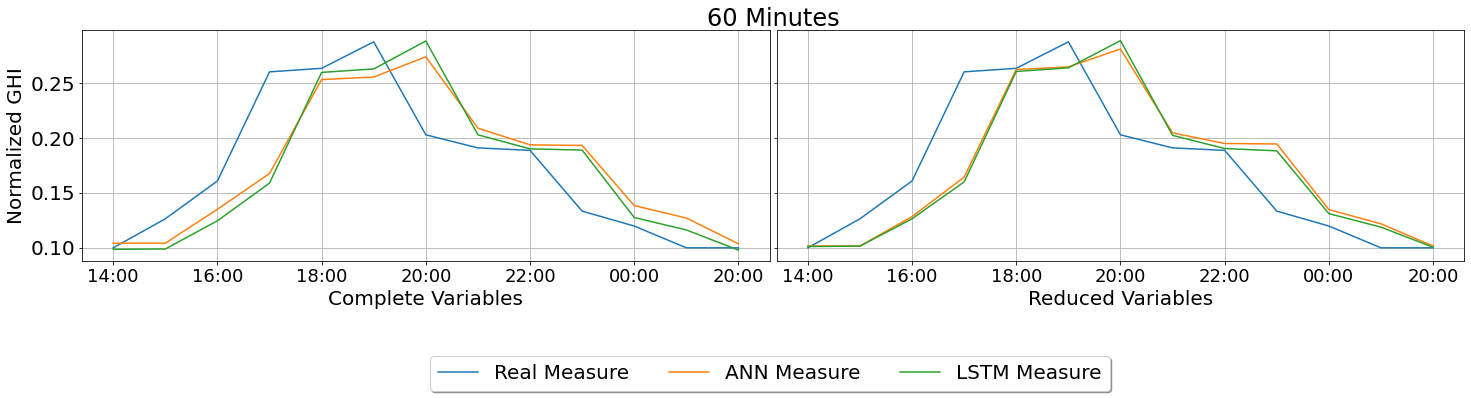

In [ ]:
inicio, final = 698, 711

labelsFontSize = 18

plt.rcParams.update({'font.size': 20})
fig3, axs = plt.subplots(1,2,sharey=True, figsize=(24,4))

fig3.suptitle("60 Minutes")

axs[0].plot(range(inicio, final), data_2014_60['Valor Real 2014'][inicio: final].values,  label="Real Measure")
axs[0].plot(range(inicio, final), data_2014_60['Valor Predito ANN 2014'][inicio: final].values, label='ANN Measure')
axs[0].plot(range(inicio, final), data_2014_60['Valor Predito LSTM 2014'][inicio: final].values, label='LSTM Measure')
axs[0].set_xlabel("Complete Variables")


axs[1].plot(range(inicio, final), data_2014_60['Valor Real 2014'][inicio: final].values,  label="Real Measure")
axs[1].plot(range(inicio, final), data_2014_60['Valor Predito ANN Red 2014'][inicio: final].values, label='ANN Measure')
axs[1].plot(range(inicio, final), data_2014_60['Valor Predito LSTM Red 2014'][inicio: final].values, label='LSTM Measure')
axs[1].set_xlabel("Reduced Variables")

axs[0].set_ylabel("Normalized GHI")
axs[0].grid(True)
axs[1].grid(True)


axs[0].set_xticks([698, 700, 702, 704, 706, 708, 710])
axs[1].set_xticks([698, 700, 702, 704, 706, 708, 710])
ticksLabels = string_60min[:]
axs[0].set_xticklabels(ticksLabels, fontsize= labelsFontSize)
axs[1].set_xticklabels(ticksLabels, fontsize= labelsFontSize)

plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.01, 
                    hspace=0.4)

axs[0].legend(fontsize = 20, loc='upper center', bbox_to_anchor=(1.0, -0.37),
          fancybox=True, shadow=True, ncol=3)

In [ ]:
fig3.savefig('/content/drive/MyDrive/IC Victor/2022/Imagens/60_minuto_hora.jpeg')

# End.